In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os, certifi
os.environ["SSL_CERT_FILE"] = certifi.where()
os.environ["REQUESTS_CA_BUNDLE"] = certifi.where()


In [17]:
# ✅ curl:(77) — PEM을 ASCII 경로로 복사 후 환경변수 고정 + yfinance 리셋
import os, pathlib, shutil, importlib, certifi

# 1) certifi PEM 원본
src_pem = pathlib.Path(certifi.where())
print("certifi.where():", src_pem, "exists?", src_pem.exists())

# 2) ASCII 경로로 복사 (C:\ProgramData\certs\cacert.pem)
target_dir = pathlib.Path(r"C:\ProgramData\certs")
target_dir.mkdir(parents=True, exist_ok=True)
dst_pem = target_dir / "cacert.pem"
shutil.copyfile(src_pem, dst_pem)
print("Copied to:", dst_pem, "exists?", dst_pem.exists())

# 3) 모든 백엔드가 보도록 환경변수 고정 (libcurl/requests/ssl 공통)
os.environ["CURL_CA_BUNDLE"]     = str(dst_pem)
os.environ["SSL_CERT_FILE"]      = str(dst_pem)
os.environ["REQUESTS_CA_BUNDLE"] = str(dst_pem)

# 4) yfinance 내부 싱글턴 리셋 (이전 세션 상태 제거)
import yfinance.data as yfd
importlib.reload(yfd)

# 5) 다운로드 재시도 (세션 인자 절대 주지 말 것)
import yfinance as yf
ticker = "NVDA"
df = yf.download(ticker, period="1y", interval="1d",
                 auto_adjust=True, progress=False)
print("rows:", len(df))
df.tail()


certifi.where(): C:\Users\서유탁\AppData\Roaming\Python\Python310\site-packages\certifi\cacert.pem exists? True
Copied to: C:\ProgramData\certs\cacert.pem exists? True
rows: 250


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-09-16,174.880005,177.500000,174.380005,177.000000,140737800
2025-09-17,170.289993,173.199997,168.410004,172.639999,211843800
2025-09-18,176.240005,177.100006,172.960007,173.979996,191763300
2025-09-19,176.669998,178.080002,175.179993,175.770004,237182100
2025-09-22,183.610001,184.550003,174.710007,175.300003,268564300


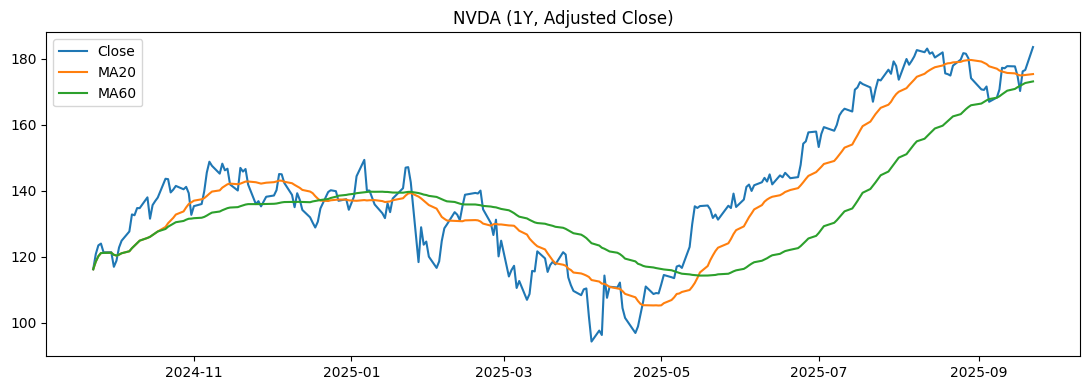

In [18]:
import matplotlib.pyplot as plt
df["MA20"] = df["Close"].rolling(20, min_periods=1).mean()
df["MA60"] = df["Close"].rolling(60, min_periods=1).mean()

plt.figure(figsize=(11,4))
plt.plot(df.index, df["Close"], label="Close")
plt.plot(df.index, df["MA20"], label="MA20")
plt.plot(df.index, df["MA60"], label="MA60")
plt.title("NVDA (1Y, Adjusted Close)")
plt.legend(); plt.tight_layout(); plt.show()
